In [57]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [58]:
import torch.nn as nn ## nearal network from pytorch

In [59]:
X = torch.linspace(1,50,50).reshape(-1,1) ##linear space
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [60]:
torch.manual_seed(71)
e = torch.randint(-8,9, (50,1), dtype = torch.float)
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [61]:
y = 2*X + 1 + e

In [62]:
y.shape

torch.Size([50, 1])

In [63]:
X.numpy() ## not be plotted in pytorch tensor

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.],
       [36.],
       [37.],
       [38.],
       [39.],
       [40.],
       [41.],
       [42.],
       [43.],
       [44.],
       [45.],
       [46.],
       [47.],
       [48.],
       [49.],
       [50.]], dtype=float32)

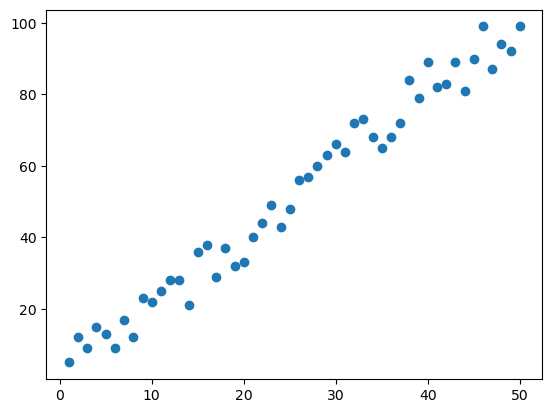

In [64]:
plt.scatter(X.numpy(), y.numpy())

In [65]:
torch.manual_seed(59)
model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [66]:
class Model(nn.Module):

    def __init__(self,in_features, out_features):

        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred


In [67]:
torch.manual_seed(59)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [68]:
for name, param in model.named_parameters(): ## get all parameter model info
    print(name,'\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [69]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [70]:
x1 = np.linspace(0.0,50.0,50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

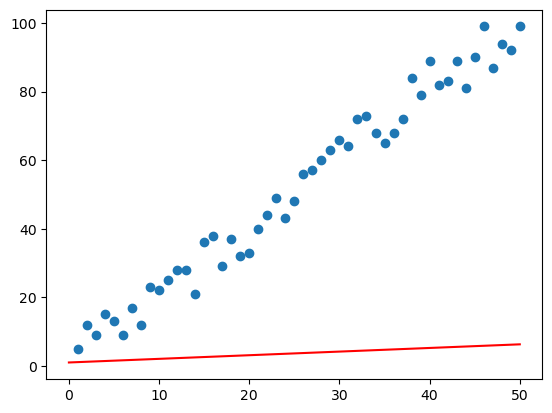

In [71]:
w1 = 0.1059 # weight
b1 = 0.9637 # bias

y1 = w1*x1 + b1 # linear func (activation function)

plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1, 'r')

In [72]:
criterion = nn.MSELoss() # mean square loss function

In [73]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [77]:
epochs = 50 #single path of entire dataset
losses = []

for i in range(epochs):
    i = i + 1
    # predicting on the forward pass
    y_pred = model.forward(X)

    #calculate our loss (error)
    loss = criterion(y_pred, y)
    

    losses.append(loss)

    print(f"epoch {i} loss : {loss.item()} weight : {model.linear.weight.item()} bias : {model.linear.bias.item()}")

    optimizer.zero_grad()
    # back propagation
    loss.backward()
    optimizer.step()

epoch 1 loss : 3057.216796875 weight : 0.10597813129425049 bias : 0.9637961387634277
epoch 2 loss : 1588.5311279296875 weight : 3.334900379180908 bias : 1.0604636669158936
epoch 3 loss : 830.30029296875 weight : 1.014832615852356 bias : 0.9922628402709961
epoch 4 loss : 438.8524169921875 weight : 2.6817996501922607 bias : 1.0425218343734741
epoch 5 loss : 236.7615203857422 weight : 1.4840211868286133 bias : 1.0076650381088257
epoch 6 loss : 132.4291229248047 weight : 2.3446059226989746 bias : 1.0339646339416504
epoch 7 loss : 78.56572723388672 weight : 1.7262253761291504 bias : 1.0163217782974243
epoch 8 loss : 50.75775909423828 weight : 2.170504093170166 bias : 1.0302516222000122
epoch 9 loss : 36.4012336730957 weight : 1.8512457609176636 bias : 1.0214954614639282
epoch 10 loss : 28.989229202270508 weight : 2.0806007385253906 bias : 1.029038906097412
epoch 11 loss : 25.162382125854492 weight : 1.9157683849334717 bias : 1.0248701572418213
epoch 12 loss : 23.186473846435547 weight : 2.0

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

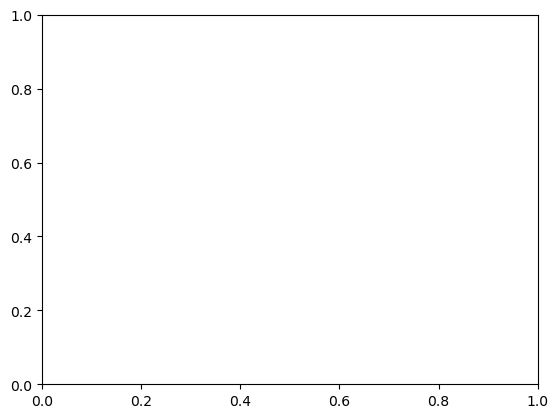

In [78]:
plt.plot(range(epochs), losses)
plt.ylabel('MSE losses')
plt.xlabel('Epoch')